# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Apriza Zicka Rizquina
- **Email:** aprizazickaa@gmail.com
- **ID Dicoding:** aprizaz

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda? 
- Bagaimana tren jumlah penyewaan sepeda berdasarkan bulan dan tahun?
- Pada jam berapa jumlah penyewa sepeda tertinggi dan terendah?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

## Data Wrangling

### Gathering Data

In [2]:
df_day = pd.read_csv("Bike-sharing-dataset/day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-11,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-11,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-11,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-11,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-11,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
df_hour = pd.read_csv("Bike-sharing-dataset/hour.csv")
df_hour.head(25)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-11,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,01-01-11,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,01-01-11,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,01-01-11,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,01-01-11,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,01-01-11,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,01-01-11,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,01-01-11,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,01-01-11,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,01-01-11,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


**Insight:**
- Dalam dataset bike-sharing terdapat dataset yang berisi informasi penggunaan sepeda harian dan penggunaan harian per jam.
- Kedua dataset memiliki informasi kolom yang sama, namun pada dataset penggunaan harian per jam terdapat tambahan kolom hr.
- Terlihat jelas dari kedua dataset tersebut, kolom dteday memiliki format yang berbeda.

### Deskripsi variable dataset
di dapatkan melalui: Readme.txt
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### Assessing Data

#### Menilai `df_day`

In [4]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
df_day.duplicated().sum()

0

In [6]:
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
df_day.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [8]:
df_day.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,01-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


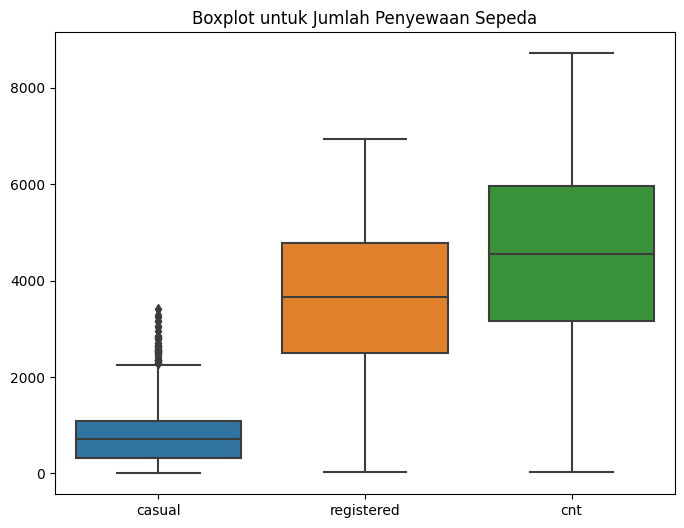

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_day.iloc[:, 13:16])  # Subset kolom 14, 15, 16
plt.title('Boxplot untuk Jumlah Penyewaan Sepeda')
plt.show()

#### Menilai `df_hour`

In [10]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
df_hour.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,01-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [12]:
df_hour.duplicated().sum()

0

In [13]:
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
df_hour.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

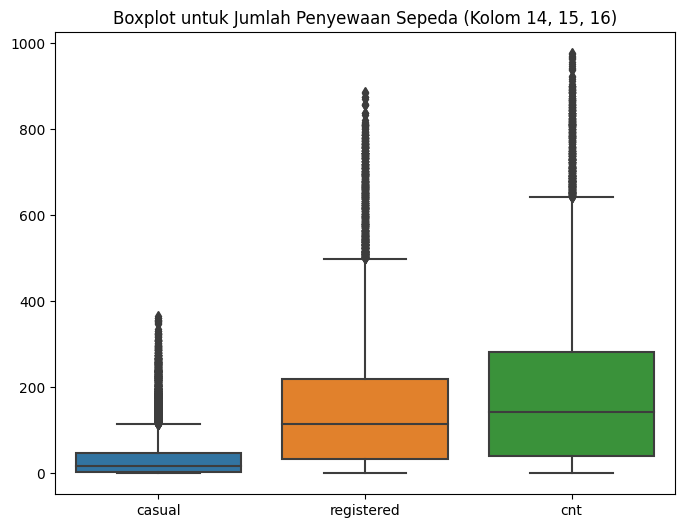

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_hour.iloc[:, 14:17])  # Subset kolom 14, 15, 16
plt.title('Boxplot untuk Jumlah Penyewaan Sepeda (Kolom 14, 15, 16)')
plt.show()

**Insight:**
- Dataset df_day memiliki jumlah data yang lebih sedikit yaitu sebanyak **731** dari pada dataset df_hour yaitu sebanyak **17379**.
- Kedua dataset tidak memiliki duplikasi data maupun *null* value.
- Beberapa kolom bersifat kategorikal yaitu: `season`, `year`, `mnth`, `hr`, `holiday`, `weekday`, `workingday`, `weathersit`. Hal ini ditinjau dengan melihat data unique dan deskripsi dataset yang telah dijelaskan diatas. Selain itu adalah kolom numerikal.
- Variasi data dari jumlah peyewaan sangat beragam yaitu dari satuan hingga ratusan yang menyebabkan banyak data outlier.
- Karena dataset `df_day` merupakan rangkuman dari `df_hour` yang dimana kedua dataset ini memiliki nilai yang sama, maka akan dataset yang akan digunakan untuk analisis lanjutan adalah dataset `df_hour`.

### Cleaning Data

In [16]:
# Labeling
df_hour.replace({
    'season': {1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'},
    'yr': {0: 2011, 1: 2012},
    'holiday': {0: 'Holiday', 1: 'Not Holiday'},
    'workingday': {0: 'Holiday', 1: 'Working Day'},
    'weekday': {
        0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
    },
    'weathersit': {
        1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'
    }
}, inplace=True)

In [17]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  object 
 7   weekday     17379 non-null  object 
 8   workingday  17379 non-null  object 
 9   weathersit  17379 non-null  object 
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(7), object(6)
memory usage: 2.3+ MB


In [18]:
# Membersihkan outlier
column_to_clean=df_hour.iloc[:, 14:17]
def remove_outliers_iqr(df_hour, column_to_clean):
    # Create an empty DataFrame to store cleaned data
    df_cleaned = df_hour.copy()
    
    # Iterate through each column in the subset for outlier removal
    for col in column_to_clean.columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
        Q1 = df_hour[col].quantile(0.25)
        Q3 = df_hour[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers by keeping only values within the bounds for the current column
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    
    return df_cleaned

# Remove outliers from the specified columns in the dataframe
df_cleaned = remove_outliers_iqr(df_hour, column_to_clean)

# Show the cleaned DataFrame
print("Cleaned DataFrame:")
print(df_cleaned.count())

Cleaned DataFrame:
instant       15558
dteday        15558
season        15558
yr            15558
mnth          15558
hr            15558
holiday       15558
weekday       15558
workingday    15558
weathersit    15558
temp          15558
atemp         15558
hum           15558
windspeed     15558
casual        15558
registered    15558
cnt           15558
dtype: int64


In [19]:
df_cleaned.describe()

,instant,yr,mnth,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,15558.000000,15558.000000,15558.000000,15558.000000,15558.000000,15558.000000,15558.000000,15558.000000,15558.000000,15558.000000,15558.000000
mean,8413.718601,2011.475768,6.479496,11.211724,0.480226,0.461082,0.640490,0.188142,23.738398,123.886811,147.625209
std,5032.416019,0.499429,3.527183,7.135844,0.190570,0.170820,0.191498,0.122890,26.551694,113.289503,130.749608
min,1.000000,2011.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4061.250000,2011.000000,3.000000,5.000000,0.320000,0.318200,0.490000,0.104500,3.000000,28.000000,32.000000
50%,8267.500000,2011.000000,6.000000,11.000000,0.460000,0.454500,0.650000,0.164200,13.000000,99.000000,119.000000
75%,12705.750000,2012.000000,10.000000,18.000000,0.640000,0.606100,0.800000,0.253700,37.000000,184.000000,227.000000
max,17379.000000,2012.000000,12.000000,23.000000,1.000000,1.000000,1.000000,0.850700,114.000000,499.000000,594.000000


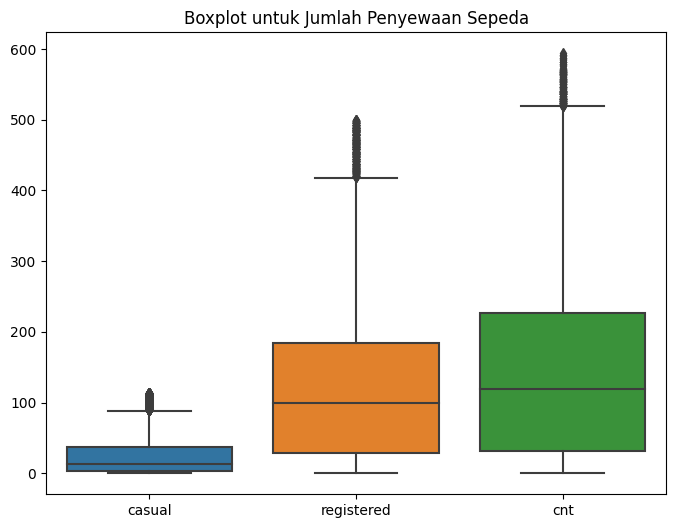

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned.iloc[:,14:17])
plt.title('Boxplot untuk Jumlah Penyewaan Sepeda')
plt.show()

In [21]:
# Mengubah format menjadi datetime
df_cleaned = df_cleaned.copy()
df_cleaned['dteday'] = pd.to_datetime(df_cleaned['dteday'])
print("dtype:", df_cleaned.dteday.dtypes)
df_cleaned.head()

dtype: datetime64[ns]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15756\2648753834.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['dteday'] = pd.to_datetime(df_cleaned['dteday'])


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,1,0,Holiday,Sat,Holiday,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,1,1,Holiday,Sat,Holiday,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,1,2,Holiday,Sat,Holiday,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,1,3,Holiday,Sat,Holiday,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,1,4,Holiday,Sat,Holiday,Clear,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Meskipun telah dilakukan pembersihan outlier pada kolom `casual`, `registered`, dan `cnt` menggunakan metode IQR, masih terdapat data yang memiliki nilai outlier. Hal ini dikarenakan rentang data yang cukup jauh.
- Mengubah kolom `dteday` ke dalam format datetime.

In [22]:
df_cleaned.to_csv("df_cleaned.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore `df_cleaned`

In [23]:
df_cleaned.groupby(by='yr').agg({
    "casual": ["sum", "max", "min", "mean", "std", ],
    "registered": ["sum", "max", "min", "mean", "std", ],
    "cnt": ["sum", "max", "min", "mean", "std", ]
})

casual                                registered                        
         sum  max min       mean        std        sum  max min        mean   
yr                                                                            
2011  174710  114   0  21.421040  24.146554     873699  499   0  107.123467  \
2012  194612  114   0  26.291813  28.757746    1053732  499   0  142.357741   

                      cnt                                   
             std      sum  max min        mean         std  
yr                                                          
2011  104.357946  1048409  594   1  128.544507  120.062298  
2012  119.696795  1248344  591   1  168.649554  138.593156

**Insight:**
- Diketahui bahwa jumlah pengguna pengguna registered/terdaftar lebih banyak dari jumlah pengguna casual. 
- Terdapat peningkatan jumlah pengguna casual sebanyak **26028** dan pengguna registered sebanyak **311722** selama setahun. 
- Rata-rata jumlah penyewaan sepeda di pertahun yaitu di angka **140** perjam di tahun 2011 dan **193** perjam di tahun 2012.

In [41]:
# check mnth
df_cleaned.groupby(by='mnth').cnt.sum().sort_values(ascending=False)

mnth
8     233736
7     230490
6     219138
5     215803
10    207843
9     198895
11    198584
12    185307
4     172578
3     163065
2     140313
1     131001
Name: cnt, dtype: int64

**Insight:**
Bulan 8 merupakan bulan dengan jumlah penyewaan tertinggi dan bulan 1 terendah.

In [26]:
df_cleaned.groupby(by="season").temp.mean()*41

season
Fall        28.644603
Springer    12.074688
Summer      21.738230
Winter      16.950464
Name: temp, dtype: float64

**Insight**: Data yang ditampilkan menunjukkan suhu rata-rata untuk setiap musim. Berdasarkan data tersebut, musim gugur (fall) memiliki rata-rata suhu tertinggi, sedangkan musim semi (spring) memiliki rata-rata suhu terendah. Namun, temuan ini perlu diteliti lebih lanjut karena terdapat inkonsistensi. Secara umum, musim panas (summer) biasanya memiliki suhu tertinggi, dan musim dingin (winter) memiliki suhu terendah.

In [27]:
df_cleaned.groupby(by="season").atemp.mean()*50

season
Fall        32.515979
Springer    14.685459
Summer      25.389382
Winter      20.341877
Name: atemp, dtype: float64

**Insight:** suhu yang dirasakan adalah suhu yang diukur berdasarkan bagaimana manusia merasakan suhu pada saat itu. Hasil pengukuran menunjukkan bahwa suhu yang dirasakan tidak jauh berbeda dengan suhu sebenarnya. Berdasarkan data, musim gugur (fall) memiliki suhu tertinggi, sedangkan musim semi (spring) memiliki suhu terendah.

In [28]:
df_cleaned.groupby(by="season").hum.mean()*100

season
Fall        65.274417
Springer    58.321170
Summer      64.945061
Winter      68.146003
Name: hum, dtype: float64

**Insight:** Kelembaban yang dihasilkan setiap musim tentu berbeda-beda. Kelembaban tertinggi berada pada saat musim dingin (winter) dan terendah pada musim semi (spring).

In [29]:
df_cleaned.groupby(by="season").windspeed.mean()*67

season
Fall        11.085904
Springer    14.383145
Summer      13.512909
Winter      11.298146
Name: windspeed, dtype: float64

**Insight:** Kecepatan angin di musim panas (summer) lebih tinggi dan di musim gugur (fall) lebih rendah dari musim lain.

In [30]:
df_cleaned.groupby(by="weathersit").temp.mean()*41

weathersit
Clear         20.162893
Heavy Rain     7.653333
Light Snow    18.441914
Mist          18.975829
Name: temp, dtype: float64

**Insight:** Suhu tertinggi terjadi saat cuaca cerah (clear), sedangkan suhu terendah terjadi saat hujan lebat (heavy rain).

In [38]:
df_cleaned.groupby(by="weathersit").atemp.mean()*50

weathersit
Clear         23.578679
Heavy Rain     9.345000
Light Snow    21.496709
Mist          22.321520
Name: atemp, dtype: float64

**Insight:** suhu yang dirasakan tertinggi juga pada saat cuaca cerah (clear) dan yang terendah saat hujan lebat (heavy rain).

In [39]:
df_cleaned.groupby(by="weathersit").hum.mean()*100

weathersit
Clear         58.698549
Heavy Rain    88.333333
Light Snow    83.216947
Mist          70.530661
Name: hum, dtype: float64

**Insight:** Kelembaban tertinggi berada pada saat hujan lebat (heavy rain) dan terendah pada saat cuaca cerah (clear).

In [40]:
df_cleaned.groupby(by="weathersit").windspeed.mean()*67

weathersit
Clear         12.580401
Heavy Rain    13.668000
Light Snow    14.609436
Mist          12.010114
Name: windspeed, dtype: float64

**Insight:** Kecepatan angin tertinggi terjadi saat bersalju (light snow), sedangkan terendah terjadi saat berkabut (mist).

## Visualization & Explanatory Analysis

### Pertanyaan 1:
- Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda? 

In [31]:
# groupby mnth season
mnth_season_df=df_cleaned.groupby(by=["mnth", "season"]).agg({
    "cnt": "sum"
}).reset_index().sort_values(by="cnt", ascending=False)
mnth_season_df

,mnth,season,cnt
9,8,Fall,233736
8,7,Fall,230490
5,5,Summer,215803
12,10,Winter,207843
13,11,Winter,198584
4,4,Summer,172578
10,9,Fall,144941
15,12,Winter,142609
7,6,Summer,141342
1,2,Springer,140313


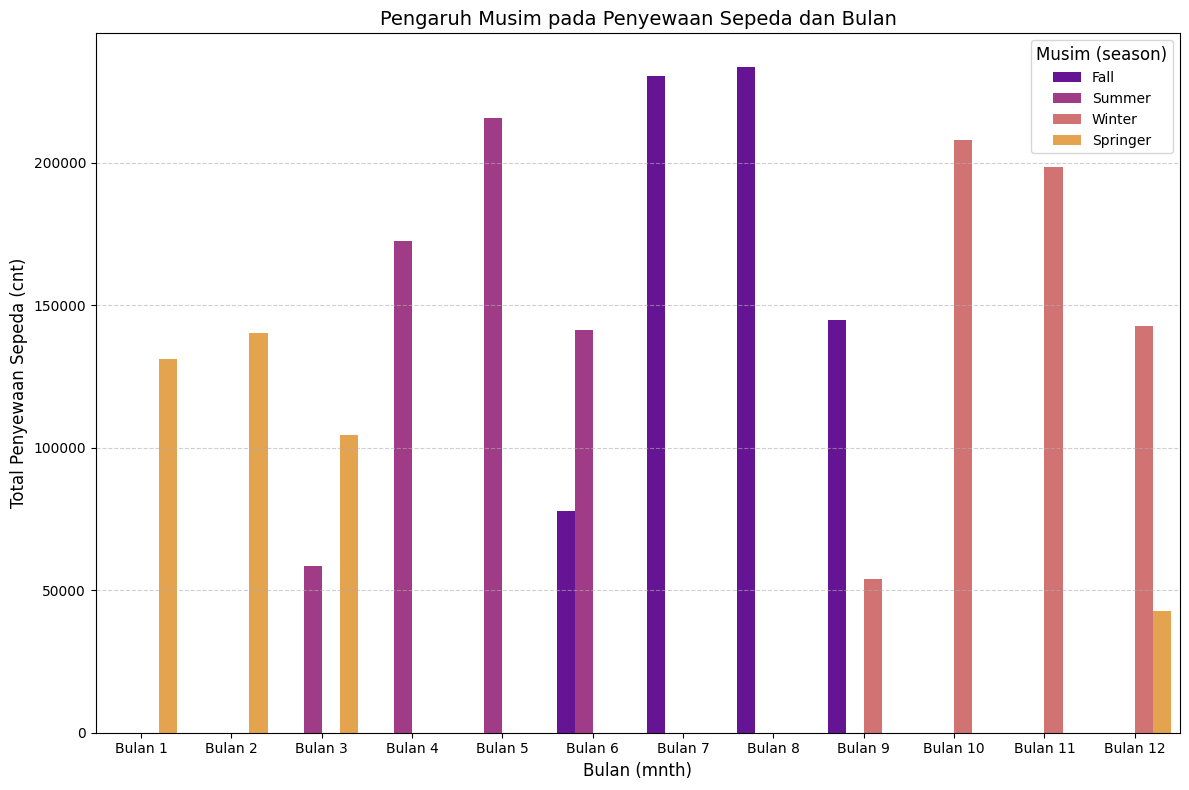

In [32]:
# Membuat plot bar
plt.figure(figsize=(12, 8))
sns.barplot(data=mnth_season_df, x="mnth", y="cnt", hue="season", palette="plasma")

# Menambahkan judul dan label
plt.title("Pengaruh Musim pada Penyewaan Sepeda dan Bulan", fontsize=14)
plt.xlabel("Bulan (mnth)", fontsize=12)
plt.ylabel("Total Penyewaan Sepeda (cnt)", fontsize=12)
plt.legend(title="Musim (season)", title_fontsize=12)
plt.xticks(ticks=range(12), labels=[f"Bulan {i+1}" for i in range(12)])  # Menyesuaikan label bulan
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Menampilkan plot
plt.tight_layout()
plt.show()


**Insight:**
- Jumlah penyewaan sepeda paling tinggi yaitu pada musim **gugur** di bulan 7 dan 8.
- Jumlah penyewaan sepeda paling rendah yaitu pada musim **dingin**  di bulan 12.

### Pertanyaan 2:
- Bagaimana tren jumlah penyewaan sepeda berdasarkan bulan dan tahun?

In [33]:
# groupby yr mnth
yr_mnth_df=df_cleaned.groupby(by=["yr", "mnth"]).agg({
    "cnt": "sum"
}).reset_index().sort_values(by=["yr", "mnth"])
yr_mnth_df

,yr,mnth,cnt
0,2011,1,38189
1,2011,2,48215
2,2011,3,60397
3,2011,4,79973
4,2011,5,109857
5,2011,6,113498
6,2011,7,112062
7,2011,8,113947
8,2011,9,96597
9,2011,10,95089


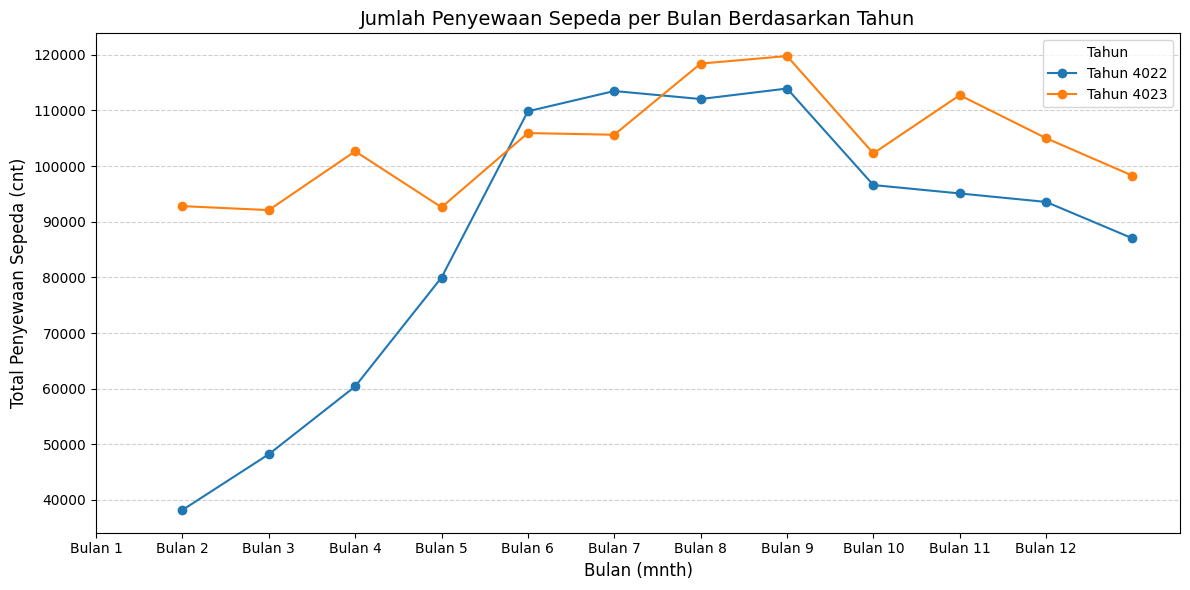

In [34]:
# Membuat plot garis
plt.figure(figsize=(12, 6))

# Plot untuk setiap tahun
for year in yr_mnth_df['yr'].unique():
    data_year = yr_mnth_df[yr_mnth_df['yr'] == year]
    plt.plot(data_year['mnth'], data_year['cnt'], marker='o', label=f"Tahun {2011 + year}")

# Menambahkan judul dan label
plt.title("Jumlah Penyewaan Sepeda per Bulan Berdasarkan Tahun", fontsize=14)
plt.xlabel("Bulan (mnth)", fontsize=12)
plt.ylabel("Total Penyewaan Sepeda (cnt)", fontsize=12)
plt.xticks(ticks=range(12), labels=[f"Bulan {i+1}" for i in range(12)])  #
plt.legend(title="Tahun", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Menampilkan plot
plt.tight_layout()
plt.show()


**Insight:**
- Terdapat kenaikan jumlah penyewaan sepeda yang sangat signifikan di tahun 2011 pada bulan 1 hingga bulan 6 dan mulai mengalami penurunan pada bulan 9 hingga bulan 12.
- Pada tahun 2012 bulan 1, jumlah penyewaan sepeda tidak mengalami kenaikan yang signifikan dari bulan sebelumnya (bulan 12 tahun 2011) yaitu berada dibawah **100.000**.

In [35]:
df_cleaned.weekday.nunique()

7

### Pertanyaan 3
- Pada jam berapa jumlah penyewa sepeda tertinggi dan terendah?

In [36]:
# groupby hr
df_cleaned.groupby(by="hr").agg({
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,cnt
hr,
19,174184
16,160158
20,159265
9,157298
7,141700
18,141535
8,130092
21,124404
17,122806


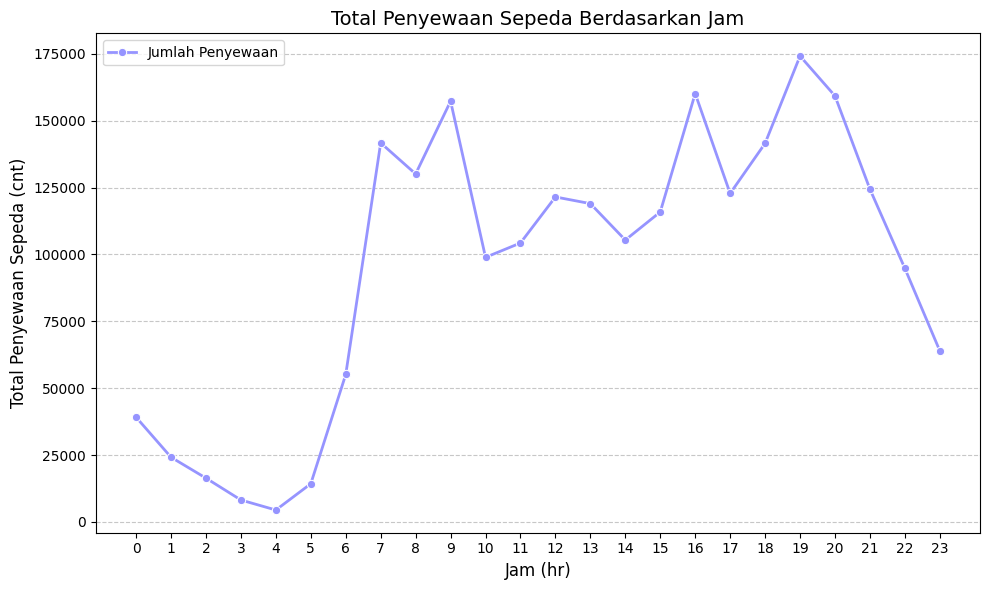

In [37]:
# Mengelompokkan data berdasarkan jam (hr) dan menghitung total penyewaan (cnt)
grouped_by_hour = df_cleaned.groupby(by="hr").agg({"cnt": "sum"}).reset_index()

# Menemukan nilai maksimum
max_row = grouped_by_hour.loc[grouped_by_hour["cnt"].idxmax()]
max_hour = max_row["hr"]
max_value = max_row["cnt"]

# Membuat line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_by_hour, x="hr", y="cnt", marker="o", linewidth=2, label="Jumlah Penyewaan", color="#9694FF")

# Menambahkan judul dan label
plt.title("Total Penyewaan Sepeda Berdasarkan Jam", fontsize=14)
plt.xlabel("Jam (hr)", fontsize=12)
plt.ylabel("Total Penyewaan Sepeda (cnt)", fontsize=12)
plt.xticks(ticks=range(0, 24), labels=[f"{i}" for i in range(0, 24)])  # Label jam
plt.legend(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()

**Insight:**
Penyewaan sepeda tertinggi terjadi pada pukul 7 malam, sedangkan yang terendah terjadi pada pukul 4 pagi.

## Conclusion

- Jumlah penyewaan sepeda paling tinggi yaitu pada musim **gugur** di bulan 7 dan 8. Jumlah penyewaan sepeda paling rendah yaitu pada musim **dingin**  di bulan 12.
- Terdapat kenaikan jumlah penyewaan sepeda yang sangat signifikan di tahun 2011 pada bulan 1 hingga bulan 6 dan mulai mengalami penurunan pada bulan 9 hingga bulan 12. Pada tahun 2012 bulan 1, jumlah penyewaan sepeda tidak mengalami kenaikan yang signifikan dari bulan sebelumnya (bulan 12 tahun 2011) yaitu berada dibawah **100.000**.
- Penyewaan sepeda tertinggi terjadi pada pukul 7 malam, sedangkan yang terendah terjadi pada pukul 4 pagi.